
Name : Kresna Andika Aprianto <br>
Email : kresnaandika36@gmail.com<br>
Github : github.com/kresnandika<br>
uname dicoding: fiellin

===== This code is all my own with some references, feel free to use it, cheers! 🍺 =====

# COVID - 19 Tweets NLP



Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material, and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations. However, analysis of social media streams is usually restricted to just basic sentiment analysis and count based metrics. This is akin to just scratching the surface and missing out on those high value insights that are waiting to be discovered. So what should a brand do to capture that low hanging fruit? <br>

The datasets is from twitter. tweets have been pulled from Twitter and manual tagging has been done then. <br>

The names and usernames have been given codes to avoid any privacy concerns. <br>

Columns:  <br>
1) Location <br>
2) Tweet At <br>
3) Original Tweet <br>
4) Label <br>

The dataset used for this project can be found at https://www.kaggle.com/datatattle/covid-19-nlp-text-classification?rvi=1

## Importing the required library's

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import nltk
nltk.download("book")

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

True

In [3]:
import tensorflow.keras.layers as L
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
import nltk
from sklearn.metrics import accuracy_score
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from string import punctuation
from nltk.corpus import stopwords
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("/kaggle/input/covid19_sentiment_analysis_nlp/Corona_NLP_train.csv",encoding="latin-1")

In [6]:
test_data = pd.read_csv("/kaggle/input/covid19_sentiment_analysis_nlp/Corona_NLP_test.csv")

In [7]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [14]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [13]:
df['Location'].value_counts()[:60]

London            1247
New York           709
United States      530
Washington         504
Los Angeles        402
Toronto            346
United Kingdom     342
India              276
Chicago            262
England            255
UK                 246
USA                231
Australia          230
California         211
San Francisco      206
Sydney             202
New Delhi          201
Melbourne          199
Canada             198
Boston             197
Mumbai             197
Atlanta            165
Global             159
Houston            156
Texas              145
Lagos              136
Austin             130
Florida            121
Seattle            120
Nairobi            117
Dallas             115
Philadelphia       114
Manchester         111
Vancouver          106
Scotland           104
New Jersey         103
Worldwide          101
San Diego           99
New York City       95
Dubai               91
Singapore           88
South Africa        87
Portland            86
Denver     

In [12]:
#splitting location into word pairs
df['Location'] = df['Location'].str.split(",").str[0]
test_data['Location'] = test_data['Location'].str.split(",").str[0]

In [11]:
df['Location'].value_counts()[:60]

London                     540
United States              528
London, England            520
New York, NY               395
Washington, DC             373
United Kingdom             337
Los Angeles, CA            281
India                      268
UK                         232
Australia                  225
USA                        223
England, United Kingdom    191
Canada                     191
Toronto, Ontario           160
Global                     159
Chicago, IL                155
California, USA            153
San Francisco, CA          152
Boston, MA                 150
New York, USA              140
New Delhi, India           138
Atlanta, GA                126
New York                   126
Mumbai, India              109
Worldwide                  101
Lagos, Nigeria              99
Texas, USA                  98
Austin, TX                  98
Houston, TX                 98
London, UK                  96
Toronto                     91
Los Angeles                 89
Nairobi,

In [10]:
df['TweetAt'].value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

In [9]:
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

Positive > Negative > Neutral and the categories will be remapped to fully represent this position.

In [18]:
def encode_sentiment(sentiment):
  if sentiment=="Neutral":
    return 0
  elif sentiment=="Positive":
    return 2
  elif sentiment=="Negative":
    return 1
  elif sentiment=="Extremely Positive":
    return 2
  elif sentiment=="Extremely Negative":
    return 1

## Visual Representation of the Training Set

Text(0.5, 1.0, 'Twitted locations')

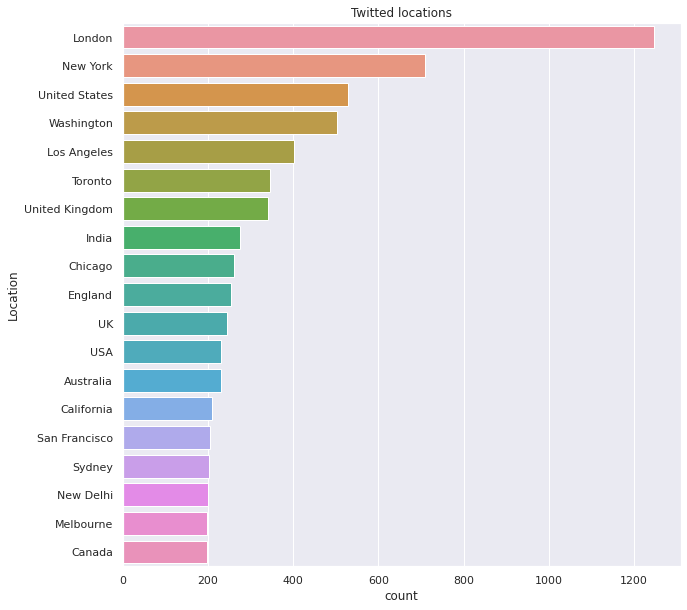

In [17]:
plt.figure(figsize=(10,10))
sns.countplot(y='Location',data=df,order=df.Location.value_counts().iloc[
    0:19].index).set_title("Twitted locations")

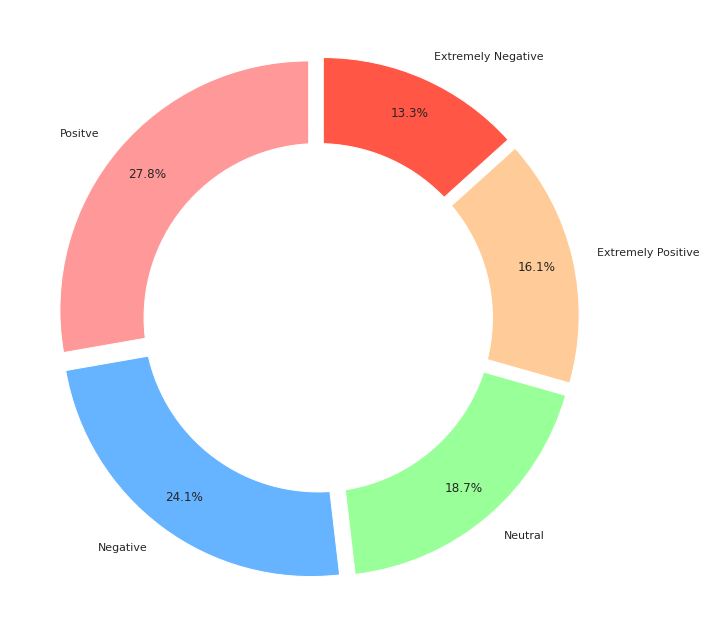

In [16]:
labels = ['Positve', 'Negative', 'Neutral', 'Extremely Positive', 'Extremely Negative']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ff5645']
explode = (0.05,0.05,0.05,0.05,0.05) 
plt.pie(df.Sentiment.value_counts(), colors = colors, labels=labels,
        autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
centreCircle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centreCircle)
plt.tight_layout()
plt.show()

In [22]:
plotDf = df.iloc[:,[2,5]] #[:,[2,5]] is the location and sentiment columns
plotDf

,Location,Sentiment
0,London,Neutral
1,UK,Positive
2,Vagabonds,Positive
3,NaN,Positive
4,NaN,Extremely Negative
...,...,...
41152,Wellington City,Neutral
41153,NaN,Extremely Negative
41154,NaN,Positive
41155,NaN,Neutral


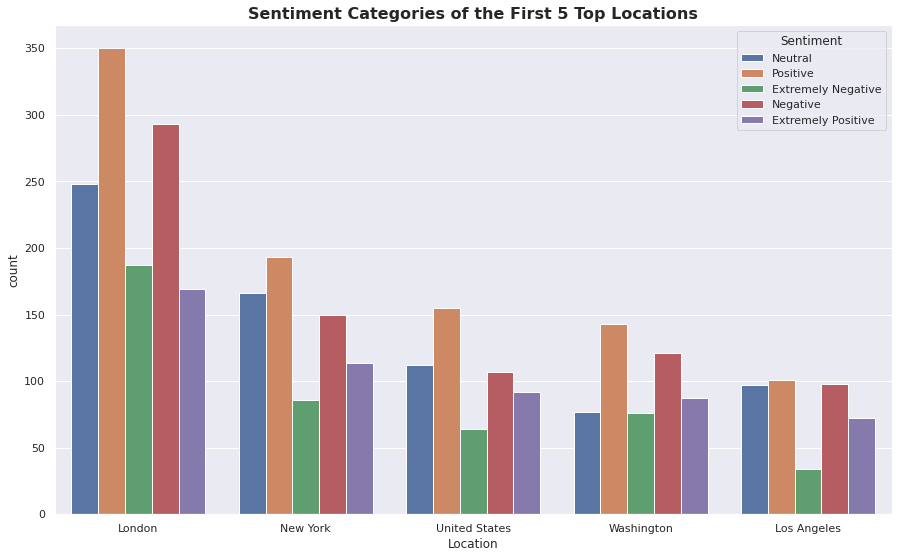

In [23]:
sns.set(rc={'figure.figsize':(15,9)})
gg = df.Location.value_counts()[:5].index
plt.title('Sentiment Categories of the First 5 Top Locations', fontsize=16, fontweight='bold')
sns.countplot(x = 'Location', hue = 'Sentiment', data = plotDf, order = gg)

## Creating a new column called 'new_sentiment'

Creating a new column called 'new_sentiment' and applying the 'encode_sentiment' function to the 'sentiment' column which results in encoding the values to an integer

In [24]:
df['new_sentiment'] = df['Sentiment'].apply(encode_sentiment)

In [25]:
df['new_sentiment'].value_counts()

2    18046
1    15398
0     7713
Name: new_sentiment, dtype: int64

In [26]:
train_df = df[['OriginalTweet','new_sentiment']]

In [27]:
train_df.head()

,OriginalTweet,new_sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0
1,advice Talk to your neighbours family to excha...,2
2,Coronavirus Australia: Woolworths to give elde...,2
3,My food stock is not the only one which is emp...,2
4,"Me, ready to go at supermarket during the #COV...",1


In [28]:
train_df = train_df.sample(frac=1)

In [29]:
sentiment = train_df['new_sentiment'].values

## Data Preprocessing


*   Convert the text to string
*   Lower the string
*   Create a Regular Expression to remove any URL's
*   Removing punctuation
*   Removing any special characters
*   Remove stopwords



In [30]:
def process_text(text):
  text = str(text) #Convert string to str
  #Lowers the string
  text = text.lower()
  #Removes the full url
  url_remove = re.compile(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?')
  text = re.sub(url_remove,' ',text)
  #Removes the punctuation
  text = ''.join([string for string in text if string not in punctuation and not string.isdigit()])
  #Removes any more special characters
  special_character = re.compile(r'[^a-zA-Z]')
  text = re.sub(special_character,' ', text)
  text = text.strip() #Strip white spaces
  text = text.split(' ')
  text = ' '.join([string for string in text if string not in stopwords.words('english')])#Removing all stop words
  return text

In [31]:
train_df['processed_tweet'] = train_df['OriginalTweet'].apply(process_text)

In [32]:
train_df.head()

,OriginalTweet,new_sentiment,processed_tweet
34170,With recent policy changes it s possible that ...,1,recent policy changes possible california coul...
723,i think........ this #PerintahKawalanPergeraka...,1,think perintahkawalanpergerakan akan cause cas...
25028,The supermarket sweep has become something of ...,2,supermarket sweep become something adrenalin s...
5099,@chiragm0808 Agar main delhi main kisi se stat...,0,chiragm agar main delhi main kisi se station m...
8796,@TheLastLeg #IsItOk that this how I imagine it...,2,thelastleg isitok imagine would watching end w...


## Tokenizing the text

In [33]:
tokenizer = Tokenizer()

In [34]:
tokenizer.fit_on_texts(train_df['processed_tweet'].values)

In [35]:
train =  tokenizer.texts_to_sequences(train_df['processed_tweet'].values)

In [36]:
train = pad_sequences(train,padding='post')

In [37]:
x_train , x_test , y_train , y_test = train_test_split(train,sentiment,test_size=0.2,random_state=42)

## Define Callback class

Model training will be stopped if its accuracy or loss is good enough

In [78]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=0.97):
      print("--> Callback: Reached 97% accuracy. That's perfect, Cheers! <--")
      self.model.stop_training = True

callbacks = myCallback()

## Defining the Model

In [79]:
embedding_vectors = 30
VOCAB_SIZE = len(tokenizer.word_index)+1

In [80]:
model = tf.keras.Sequential([
    L.Embedding(VOCAB_SIZE,embedding_vectors, input_length=x_train.shape[1]),
    L.Bidirectional(L.LSTM(256,return_sequences=True)),
    L.GlobalMaxPool1D(),
    L.Dropout(0.4),
    L.Dense(256, activation="relu"),
    L.Dropout(0.4),
    L.Dense(3)
])

## Compiling the model with its optimizer, loss function and metric

In [81]:
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',metrics=['accuracy']
             )

In [82]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 46, 30)            1709340   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 46, 512)           587776    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

## Run model with callback

In [83]:
history = model.fit(x_train,y_train,epochs=10, callbacks=[callbacks],
          validation_data=(x_test,y_test))

Epoch 1/10
1029/1029 [==============================] - 337s 325ms/step - loss: 0.6689 - accuracy: 0.7157 - val_loss: 0.4641 - val_accuracy: 0.8460
Epoch 2/10
1029/1029 [==============================] - 341s 332ms/step - loss: 0.3532 - accuracy: 0.8814 - val_loss: 0.4313 - val_accuracy: 0.8499
Epoch 3/10
1029/1029 [==============================] - 332s 322ms/step - loss: 0.2203 - accuracy: 0.9285 - val_loss: 0.4960 - val_accuracy: 0.8401
Epoch 4/10
1029/1029 [==============================] - 324s 315ms/step - loss: 0.1485 - accuracy: 0.9514 - val_loss: 0.5806 - val_accuracy: 0.8304
Epoch 5/10
1029/1029 [==============================] - 325s 316ms/step - loss: 0.1067 - accuracy: 0.9657 - val_loss: 0.6473 - val_accuracy: 0.8156
Epoch 6/10
1029/1029 [==============================] - 332s 322ms/step - loss: 0.0737 - accuracy: 0.9765 - val_loss: 0.7415 - val_accuracy: 0.8124
--> Callback: Reached 97% accuracy. That's perfect, Cheers! <--


## Making predictions on test data

In [84]:
test = test_data[['OriginalTweet','Sentiment']]

In [85]:
test['processed_tweet'] = test_data['OriginalTweet'].apply(process_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
test['new_sentiment'] = test_data['Sentiment'].apply(encode_sentiment)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
test.drop(['OriginalTweet','Sentiment'],inplace=True,axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [88]:
test.head()

,processed_tweet,new_sentiment
0,trending new yorkers encounter empty supermark...,1
1,couldnt find hand sanitizer fred meyer turned ...,2
2,find protect loved ones coronavirus,2
3,panic buying hits newyork city anxious shopper...,1
4,toiletpaper dunnypaper coronavirus coronavirus...,0


In [89]:
test_tweet = test['processed_tweet'].values
test_sentiment = test['new_sentiment'].values

In [90]:
convert_seq = tokenizer.texts_to_sequences(test_tweet)

In [91]:
convert_seq = pad_sequences(convert_seq,padding='post')

In [92]:
predict = model.predict_classes(convert_seq)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [93]:
print(f"The accuracy is : { accuracy_score(test_sentiment,predict)*100}%")

The accuracy is : 78.4623486045287%


## Plot loss, Accuracy, Classification report and Confusion Matrix

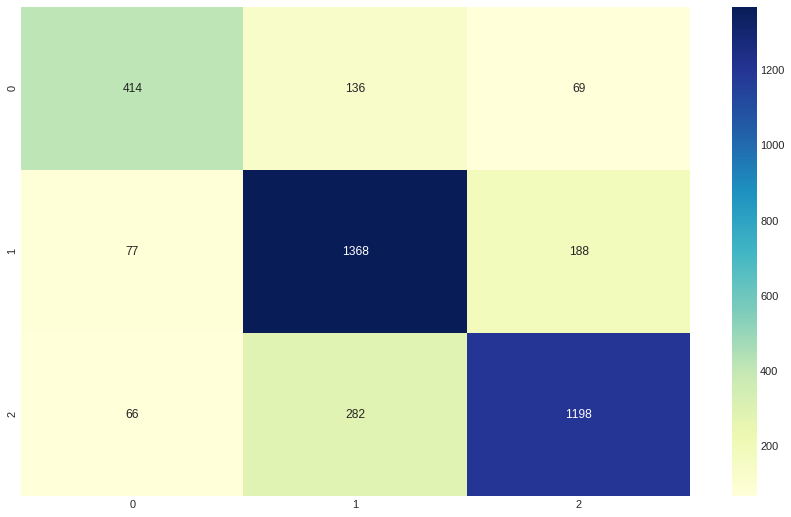

In [94]:
sns.heatmap(confusion_matrix(test_sentiment,predict),annot=True, fmt="d", cmap='YlGnBu')

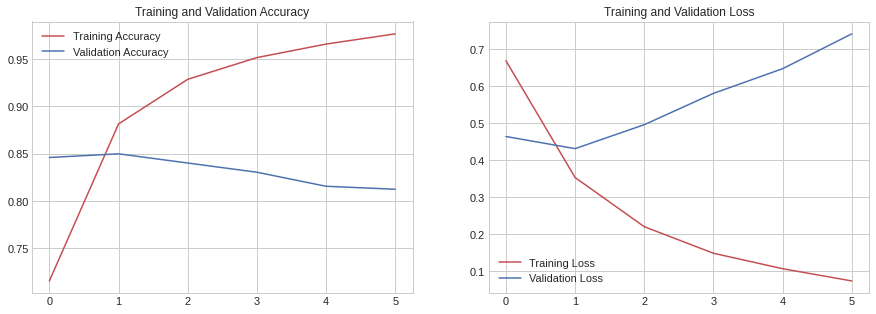

In [95]:
plt.style.use('seaborn-whitegrid')

def plot_acc(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plt.subplot(1, 2, 1)
  acc_plot, = plt.plot(epochs, acc, 'r')
  val_acc_plot, = plt.plot(epochs, val_acc, 'b')
  plt.title('Training and Validation Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])


def plot_loss(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  plt.subplot(1, 2, 2)
  loss_plot, = plt.plot(epochs, loss, 'r')
  val_loss_plot, = plt.plot(epochs, val_loss, 'b')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

def plot_history(history):
  plt.figure(figsize=(15,5))
  plot_acc(history)
  plot_loss(history)


plot_history(history)